In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:

df_data=pd.read_table('genetic_data.txt',sep=" ",skiprows=6)
print(df_data)
print(df_data.iloc[:4,:])

      Generation         x         y      f(x,y)       fitness
0              0 -0.994021 -1.189470  478.146000  1.000000e-19
1              0 -0.310167  0.616663   28.804300  3.093360e-13
2              0 -0.121011  0.836411   68.786800  1.337430e-30
3              0  0.037983 -0.822547   68.821400  1.291900e-30
4              0 -0.637894 -1.452200  348.310000  1.000000e-19
5              0  0.851362  1.274260   30.210700  7.580120e-14
6              0 -1.066640 -1.007010  464.260000  1.000000e-19
7              0  0.606436 -1.473090  339.029000  1.000000e-19
8              0 -0.585852  0.996464   45.187500  2.373220e-20
9              0 -1.258290  0.389727  147.559000  1.000000e-19
10             0  0.529450  1.467270  141.108000  1.000000e-19
11             0 -0.357308 -0.456259   35.939500  2.464180e-16
12             0 -0.497835 -0.809164  113.969000  1.000000e-19
13             0 -0.435311 -1.273420  216.073000  1.000000e-19
14             0  1.184030 -0.838264  501.878000  1.000

/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [3]:
#split in Generations
generations=[]
count=0
before=0
tmp_list=[]
for i,gen in enumerate(df_data["Generation"]):
    if gen!=count:
        generations.append(df_data.iloc[before:i-1,:])
        before=i-1
        count+=1
print(generations[9]['fitness'].max())

0.315684


In [4]:
#find fittest per Generation
fitest=[]
best_sol_x=[]
best_sol_y=[]
for i,gen in enumerate(generations):
    fitest.append(generations[i]['fitness'].max())
    for j,ele in enumerate(generations[i]['fitness']):
        if (generations[i]['fitness'].iloc[j]==fitest[i]):
            best_sol_x.append(generations[i]['x'].iloc[j])
            best_sol_y.append(generations[i]['y'].iloc[j])

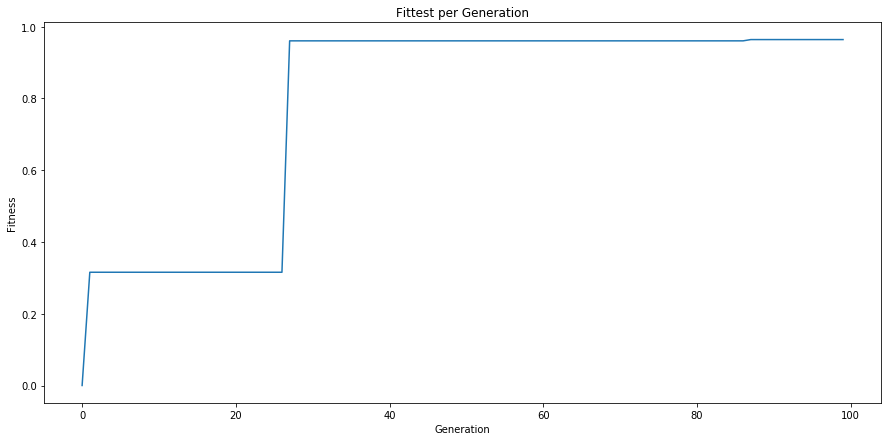

In [5]:
plt.figure(figsize=(15,7))
plt.plot(fitest)
#plt.yscale('log')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.savefig('Fittest.png')

In [6]:
def f(x,y):
    return 100*x**4-200*x**2*y+100*y**2+x**2-2*x+1

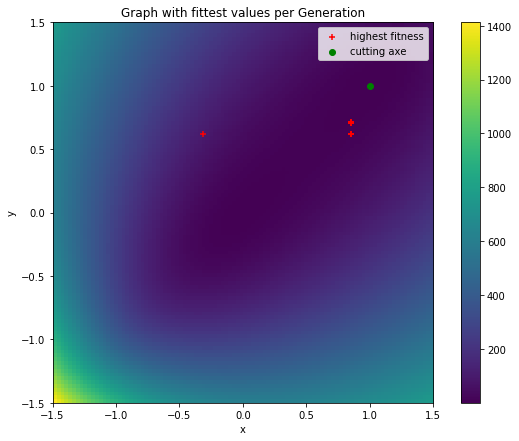

In [7]:
#3D plot, best solution per Generation
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Graph with fittest values per Generation')
ax.scatter(best_sol_x,best_sol_y,c='r',marker='+',label='highest fitness')
ry = np.linspace(-1.5,1.5,100)
rx = np.linspace(-1.5,1.5,100)
x,y  = np.meshgrid(rx,ry)
ax.scatter(1,1,c='g',marker='o',label='cutting axe')
#ax.plot(x,y,f(x,y))
#ax.contour3D(x,y,f(x,y),50) 
#plt.contourf(x,y,f(x,y),50)
rz=f(rx,ry)
rbf = scipy.interpolate.Rbf(rx, ry, rz, function='multiquadric')
z=rbf(x,y)
plt.imshow(z, vmin=rz.min(), vmax=rz.max(), origin='lower', 
           extent=[rx.min(), rx.max(), ry.min(), ry.max()])
plt.colorbar()
plt.legend()
# extent=[rx.min(), rx.max(), ry.min(), ry.max()])
plt.savefig('Graph.png')